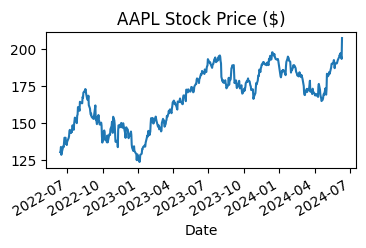

In [1]:
import yfinance
import numpy as np
from matplotlib import pyplot as plt


def get_stock_price(ticker):
    stock = yfinance.Ticker(ticker)
    return stock.history(period="2y")


ticker = "AAPL"
stock_price_df = get_stock_price(ticker)

# Basic Stock Chart
plt.figure(figsize=(4, 2))
stock_price_df["Close"].plot(title=f"{ticker} Stock Price ($)")
plt.show()

In [2]:
# Compute daily returns to estimate mu and sigma for the stock's GBM model.
# Note that this is very rough estimation and should not be used for actual trading.

# Compute returns
returns = stock_price_df["Close"].pct_change().dropna()

# Set initial price
initial_price = stock_price_df["Close"].values[0]

# Compute mu and sigma
mu = np.mean(returns) * len(returns)
sigma = np.std(returns) * np.sqrt(len(returns))
print(f"Estimated mu: {mu:.3f} / sigma: {sigma:.3f}")

Estimated mu: 0.531 / sigma: 0.370


In [3]:
"""
GBM Parameters:
    S_o - initial stock price
    MU - the mean of returns
    SIGMA - standard deviation of returns (volatility)
    W - Brownian motion
    T - time horizon
    N - number of intervals
"""

S0 = initial_price
MU = mu
SIGMA = sigma
N = len(stock_price_df)
print(f"Initial price: {S0:.4f} / mu: {MU:.4f} / sigma: {SIGMA:.4f} / N: {N}")


class GBM_Simulator:
    def __init__(self, s0, mu, sigma, N):
        self.s0 = s0
        self.mu = mu
        self.sigma = sigma
        self.N = N
        self.dt = 1 / N

    def simulate(self, num_simulation):
        simulations = np.zeros((self.N, num_simulation))
        simulations[0] = self.s0
        for t in range(1, self.N):
            z = np.random.standard_normal(num_simulation)
            simulations[t] = simulations[t - 1] * np.exp(
                (self.mu - 0.5 * self.sigma**2) * self.dt + self.sigma * np.sqrt(self.dt) * z
            )

        return simulations


simulator = GBM_Simulator(S0, MU, SIGMA, N)

Initial price: 130.4047 / mu: 0.5313 / sigma: 0.3705 / N: 502


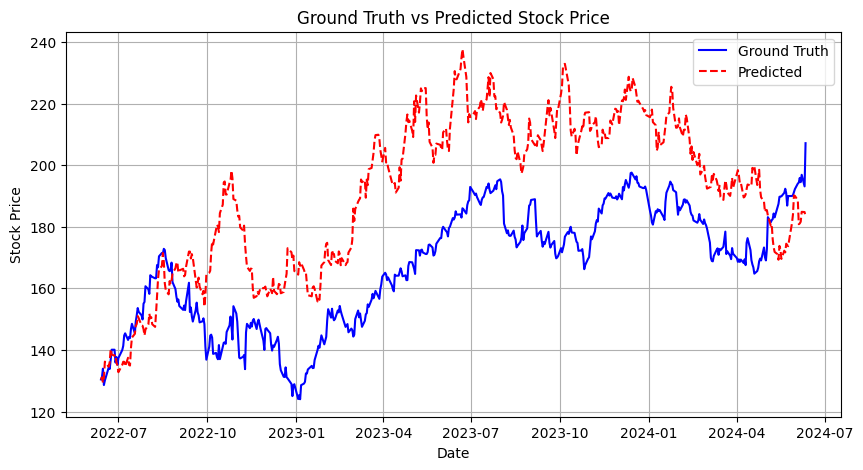

In [4]:
# Single Simulation of GBM

simulated_pred = simulator.simulate(num_simulation=1)[:,0]

plt.figure(figsize=(10, 5))
plt.plot(
    stock_price_df.index, stock_price_df["Close"], label="Ground Truth", color="blue"
)
plt.plot(
    stock_price_df.index, simulated_pred, label="Predicted", color="red", linestyle="--"
)
plt.title("Ground Truth vs Predicted Stock Price")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

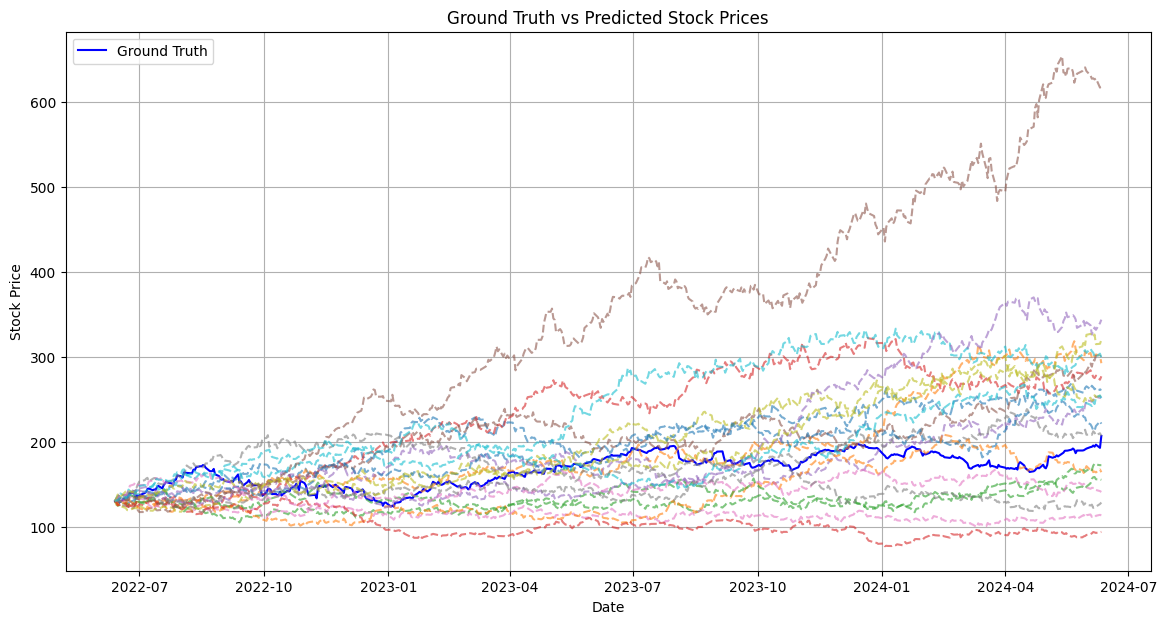

In [5]:
# Multiple Simulations of GBM

# Running multiple simulations
simulated_preds = simulator.simulate(num_simulation=20)

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(
    stock_price_df.index, stock_price_df["Close"], label="Ground Truth", color="blue"
)

# Plot each simulation's predictions
for i, simulated_pred in enumerate(simulated_preds.T):
    plt.plot(
        stock_price_df.index,
        simulated_pred,
        linestyle="--",
        alpha=0.6,
    )

plt.title("Ground Truth vs Predicted Stock Prices")
plt.xlabel("Date")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()